In [1]:
import numpy as np
import matplotlib.pyplot as plt

미분(Differential) 함수 정의: Δx → 0  
diff1(미분할 함수, 미분할 값, Δx)

<img src="./images/differential1.png" align="left" width="300"/>

In [2]:
def diff1(f, x, h=1e-6):
    return (f(x + h) - f(x)) / h

미분(Differential) 함수 정의: 대칭 파생(Symmetric derivative)  
diff2(미분할 함수, 미분할 값, Δx)

<img src="./images/differential2.png" align="left" width="300"/>

In [3]:
def diff2(f, x, h=1e-6):
    return (f(x + h) - f(x - h)) / (2 * h)

미분 함수 실행

In [4]:
def f1(x):
    return x ** 2
print(diff1(f1, 1))
print(diff2(f1, 1))

2.0000009999243673
2.000000000002


In [5]:
f2 = lambda x: x ** 2
print(diff1(f2, 1))
print(diff2(f2, 1))

2.0000009999243673
2.000000000002


경사하강(강하)법

In [6]:
# 경사하강법 클래스, 옵티마이저
class descent:
    def __init__(self, lr, h=1e-6):
        self.lr = lr # 학습율
        self.h = h # 수치 미분을 위해 지정하는 값으로 작을수록 더 정교하게 미분을 실행한다.
        
    def n_D(self, f, x): # 미분 함수
        return (f(x + self.h) - f(x - self.h)) / (2 * self.h)
    
    def update(self, f, x): # 경사하강법 업데이트 함수
        df = self.n_D(f, x)
        return x - self.lr * df
    
    def __str__(self):
        return '경사하강법(학습율 = {})'.format(self.lr)

In [7]:
# 경사하강법 시각화 클래스
class one_variable_ftn:
    def __init__(self, ftn, opti):
        self.ftn = ftn # 최적화하려는 함수
        self.opti = opti # 옵티마이저
        
    def run(self, x, iteration): # 경사하강법 실행 함수
        self.xs = [x]
        for i in range(iteration):
            self.xs.append(self.opti.update(self.ftn, self.xs[-1]))
        print('{}에서 시작해서 {}번 {}을(를) 적용한 결과는 {:5.3f}입니다.'.format(x, iteration, self.opti, self.xs[-1]))
        
    def visualize(self, xi, xe): # 시각화 함수
        x = np.linspace(xi, xe, int((xe - xi) * 100))
        y = [self.ftn(xx) for xx in x]
        plt.plot(x, y, 'k-') # 2차원 곡선
        ys = [self.ftn(xx) for xx in self.xs]
        plt.plot(self.xs, ys, 'r*') # 경사하강법으로 이동하는 위치
        plt.show()
        
    def history(self):
        for i, x in enumerate(self.xs):
            print('{:3d}번 {}을(를) 적용한 결과는 {:5.3f}입니다.'.format(i + 1, self.opti, x))

In [8]:
# 경사하강법 실행
opti1 = descent(0.01) # 경사하강법(옵티마이저) 클래스 객체 생성
print(opti1)
f1 = lambda x: x ** 2 # 미분할 함수
ex1 = one_variable_ftn(f1, opti1) # 경사하강법을 적용한 결과를 시각화하는 클래스 객체 생성

경사하강법(학습율 = 0.01)


In [9]:
ex1.run(2, 100) # 경사하강법 실행, 2에서 출발해서 100번 최적화 적용

2에서 시작해서 100번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 0.265입니다.


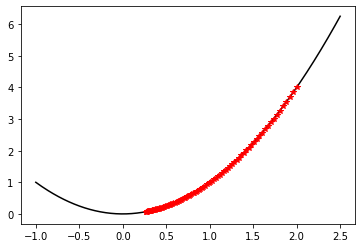

In [10]:
ex1.visualize(-1, 2.5) # 경사하강법 실행 결과 시각화

In [11]:
ex1.history()

  1번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 2.000입니다.
  2번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.960입니다.
  3번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.921입니다.
  4번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.882입니다.
  5번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.845입니다.
  6번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.808입니다.
  7번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.772입니다.
  8번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.736입니다.
  9번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.702입니다.
 10번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.667입니다.
 11번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.634입니다.
 12번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.601입니다.
 13번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.569입니다.
 14번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.538입니다.
 15번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.507입니다.
 16번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.477입니다.
 17번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.448입니다.
 18번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.419입니다.
 19번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.390입니다.
 20번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.362입니다.
 21번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.335입니다.
 22번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.309입니다.
 23번 경사하강법

2에서 시작해서 100번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.000입니다.


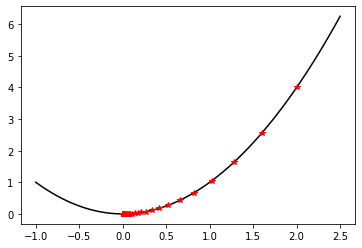

  1번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 2.000입니다.
  2번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 1.600입니다.
  3번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 1.280입니다.
  4번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 1.024입니다.
  5번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.819입니다.
  6번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.655입니다.
  7번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.524입니다.
  8번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.419입니다.
  9번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.336입니다.
 10번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.268입니다.
 11번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.215입니다.
 12번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.172입니다.
 13번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.137입니다.
 14번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.110입니다.
 15번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.088입니다.
 16번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.070입니다.
 17번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.056입니다.
 18번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.045입니다.
 19번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.036입니다.
 20번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.029입니다.
 21번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.023입니다.
 22번 경사하강법(학습율 = 0.1)을(를) 적용한 결과는 0.018입니다.
 23번 경사하강법(학습율 = 0.1)을(를) 적용한 결과

In [12]:
opti2 = descent(0.1) # 학습율 0.01을 0.1로 올림
ex2 = one_variable_ftn(f1, opti2)
ex2.run(2, 100)
ex2.visualize(-1, 2.5)
ex2.history()

2에서 시작해서 5번 경사하강법(학습율 = 1.6)을(를) 적용한 결과는 -103.073입니다.


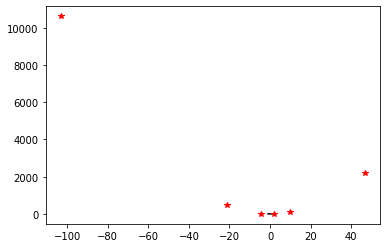

  1번 경사하강법(학습율 = 1.6)을(를) 적용한 결과는 2.000입니다.
  2번 경사하강법(학습율 = 1.6)을(를) 적용한 결과는 -4.400입니다.
  3번 경사하강법(학습율 = 1.6)을(를) 적용한 결과는 9.680입니다.
  4번 경사하강법(학습율 = 1.6)을(를) 적용한 결과는 -21.296입니다.
  5번 경사하강법(학습율 = 1.6)을(를) 적용한 결과는 46.851입니다.
  6번 경사하강법(학습율 = 1.6)을(를) 적용한 결과는 -103.073입니다.


In [13]:
opti3 = descent(1.6) # 학습율이 너무 크다.
ex3 = one_variable_ftn(f1, opti3)
ex3.run(2, 5)
ex3.visualize(-1, 2.5)
ex3.history()

2에서 시작해서 100번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 0.344입니다.


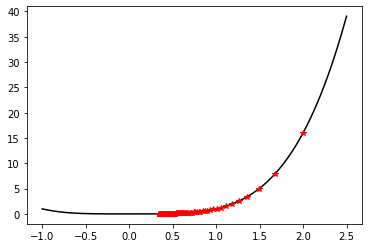

  1번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 2.000입니다.
  2번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.680입니다.
  3번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.490입니다.
  4번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.358입니다.
  5번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.258입니다.
  6번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.178입니다.
  7번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.113입니다.
  8번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.058입니다.
  9번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.010입니다.
 10번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 0.969입니다.
 11번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 0.933입니다.
 12번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 0.900입니다.
 13번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 0.871입니다.
 14번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 0.845입니다.
 15번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 0.821입니다.
 16번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 0.798입니다.
 17번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 0.778입니다.
 18번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 0.759입니다.
 19번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 0.742입니다.
 20번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 0.725입니다.
 21번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 0.710입니다.
 22번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 0.696입니다.
 23번 경사하강법

In [14]:
f2 = lambda x: x ** 4 # 원점 근처에서 더 평평해 진다.
ex4 = one_variable_ftn(f2, opti1) # 학습율이 0.01인 옵티마이저
ex4.run(2, 100)
ex4.visualize(-1, 2.5)
ex4.history()

In [15]:
def f3(x):
    if x > 1:
        return x ** 2
    elif x > 0.2:
        return 1
    else:
        return 25 * x ** 2

2에서 시작해서 200번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 0.986입니다.


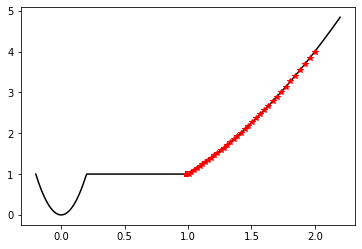

  1번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 2.000입니다.
  2번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.960입니다.
  3번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.921입니다.
  4번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.882입니다.
  5번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.845입니다.
  6번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.808입니다.
  7번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.772입니다.
  8번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.736입니다.
  9번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.702입니다.
 10번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.667입니다.
 11번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.634입니다.
 12번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.601입니다.
 13번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.569입니다.
 14번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.538입니다.
 15번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.507입니다.
 16번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.477입니다.
 17번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.448입니다.
 18번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.419입니다.
 19번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.390입니다.
 20번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.362입니다.
 21번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.335입니다.
 22번 경사하강법(학습율 = 0.01)을(를) 적용한 결과는 1.309입니다.
 23번 경사하강법

In [16]:
ex5 = one_variable_ftn(f3, opti1) # 가운데 평탄한(기울기가 0) 구간이 있는 조금 더 복잡한 함수
ex5.run(2, 200)
ex5.visualize(-0.2, 2.2)
ex5.history()

모멘텀(Momentum)

In [17]:
# 모멘텀 클래스, 옵티마이저
class Momentum_descent:
    def __init__(self, mu, lr, h=1e-6):
        self.previous = 0 # 이전에 얼마나 움직였나를 기록한다.
        self.mu = mu # 관성, 보통 0.8이나 0.9를 사용한다.
        self.lr = lr
        self.h = h
        
    def n_D(self, f, x):
        return (f(x + self.h) - f(x - self.h)) / (2 * self.h)
    
    def update(self, f, x):
        dx = self.mu * self.previous - self.lr * self.n_D(f, x)
        self.previous = dx # 다음 연산시 이전 값으로 사용하기 위해 저장한다.
        return x + dx
    
    def __str__(self):
        return '모멘텀 경사하강법(관성 = {}, 학습율 = {})'.format(self.mu, self.lr)

2에서 시작해서 19번 모멘텀 경사하강법(관성 = 0.9, 학습율 = 0.01)을(를) 적용한 결과는 -0.124입니다.


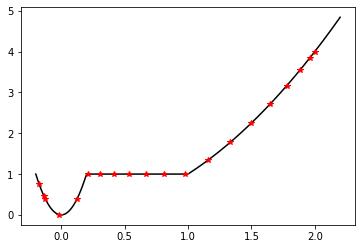

  1번 모멘텀 경사하강법(관성 = 0.9, 학습율 = 0.01)을(를) 적용한 결과는 2.000입니다.
  2번 모멘텀 경사하강법(관성 = 0.9, 학습율 = 0.01)을(를) 적용한 결과는 1.960입니다.
  3번 모멘텀 경사하강법(관성 = 0.9, 학습율 = 0.01)을(를) 적용한 결과는 1.885입니다.
  4번 모멘텀 경사하강법(관성 = 0.9, 학습율 = 0.01)을(를) 적용한 결과는 1.779입니다.
  5번 모멘텀 경사하강법(관성 = 0.9, 학습율 = 0.01)을(를) 적용한 결과는 1.649입니다.
  6번 모멘텀 경사하강법(관성 = 0.9, 학습율 = 0.01)을(를) 적용한 결과는 1.499입니다.
  7번 모멘텀 경사하강법(관성 = 0.9, 학습율 = 0.01)을(를) 적용한 결과는 1.333입니다.
  8번 모멘텀 경사하강법(관성 = 0.9, 학습율 = 0.01)을(를) 적용한 결과는 1.158입니다.
  9번 모멘텀 경사하강법(관성 = 0.9, 학습율 = 0.01)을(를) 적용한 결과는 0.977입니다.
 10번 모멘텀 경사하강법(관성 = 0.9, 학습율 = 0.01)을(를) 적용한 결과는 0.814입니다.
 11번 모멘텀 경사하강법(관성 = 0.9, 학습율 = 0.01)을(를) 적용한 결과는 0.667입니다.
 12번 모멘텀 경사하강법(관성 = 0.9, 학습율 = 0.01)을(를) 적용한 결과는 0.535입니다.
 13번 모멘텀 경사하강법(관성 = 0.9, 학습율 = 0.01)을(를) 적용한 결과는 0.416입니다.
 14번 모멘텀 경사하강법(관성 = 0.9, 학습율 = 0.01)을(를) 적용한 결과는 0.310입니다.
 15번 모멘텀 경사하강법(관성 = 0.9, 학습율 = 0.01)을(를) 적용한 결과는 0.213입니다.
 16번 모멘텀 경사하강법(관성 = 0.9, 학습율 = 0.01)을(를) 적용한 결과는 0.127입니다.
 17번 모멘텀 경사하강법(관성 = 0.9, 학습율 = 0.01)을(를) 적용한 결과는 -0.015입

In [27]:
mom_opti = Momentum_descent(0.9, 0.01)
ex6 = one_variable_ftn(f3, mom_opti)
ex6.run(2, 19)
ex6.visualize(-0.2, 2.2)
ex6.history()